<a href="https://colab.research.google.com/github/Nethmi-Maleesha/20521336_DSPL_Week7/blob/main/Tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 01

In [ ]:
# Load the dataset
df = pd.read_csv("/content/diabetes.csv")
# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Task 02

In [ ]:
# Calculate median blood pressure for patients diagnosed with diabetes
median_bp = df[df['Outcome'] == 1]['BloodPressure'].median()
print("Median Blood Pressure for diagnosed patients:", median_bp)


Median Blood Pressure for diagnosed patients: 74.0


Task 03

Outcome
0    500
1    268
Name: count, dtype: int64


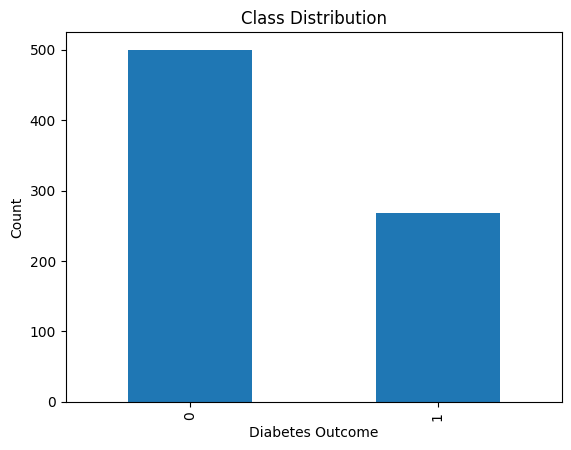

In [ ]:
import matplotlib.pyplot as plt

# Check distribution of target variable (Outcome)
print(df['Outcome'].value_counts())

# Visualize class distribution
df['Outcome'].value_counts().plot(kind='bar', title="Class Distribution")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()


Task 04

In [ ]:
X = df.drop(columns=['Outcome'])  # Features
Y = df['Outcome']  # Target variable

# Print shape to confirm separation
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (768, 8)
Shape of Y: (768,)


Task 05

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (Features) and y (Target Variable)
X = df.drop(columns=["Outcome"])  # Drop the target column
y = df["Outcome"]  # Target variable (diabetes diagnosis)

# Train-test split (75% training, 25% testing with stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Check if the split is successful
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts())
print("Class distribution in testing set:\n", y_test.value_counts())


Training set size: (576, 8)
Testing set size: (192, 8)
Class distribution in training set:
 Outcome
0    375
1    201
Name: count, dtype: int64
Class distribution in testing set:
 Outcome
0    125
1     67
Name: count, dtype: int64


The provided code splits the dataset into training and testing sets using an 80-20 ratio.

- test_size=0.2 → 20% of data is used for testing.
- random_state=1 → Ensures reproducibility.
- stratify=y → Ensures that the proportion of diabetes and non-diabetes cases remains the same in both train and test sets.

Task 06

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 75% training and 25% testing (3:1 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1, stratify=Y)


Task 07

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# Evaluate accuracy
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.72


Task 08

In [ ]:
# Compare train and test accuracy
train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.72


Task 09

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       125
           1       0.62      0.52      0.57        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192



- Precision → % of predicted positives that are actually positive.
- Recall → % of actual positives correctly identified.

Task 10

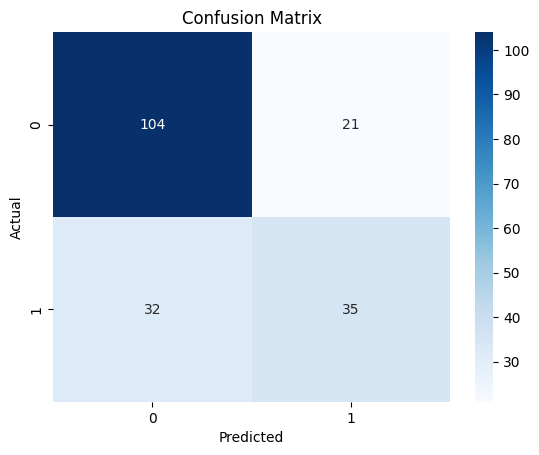

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Task 11

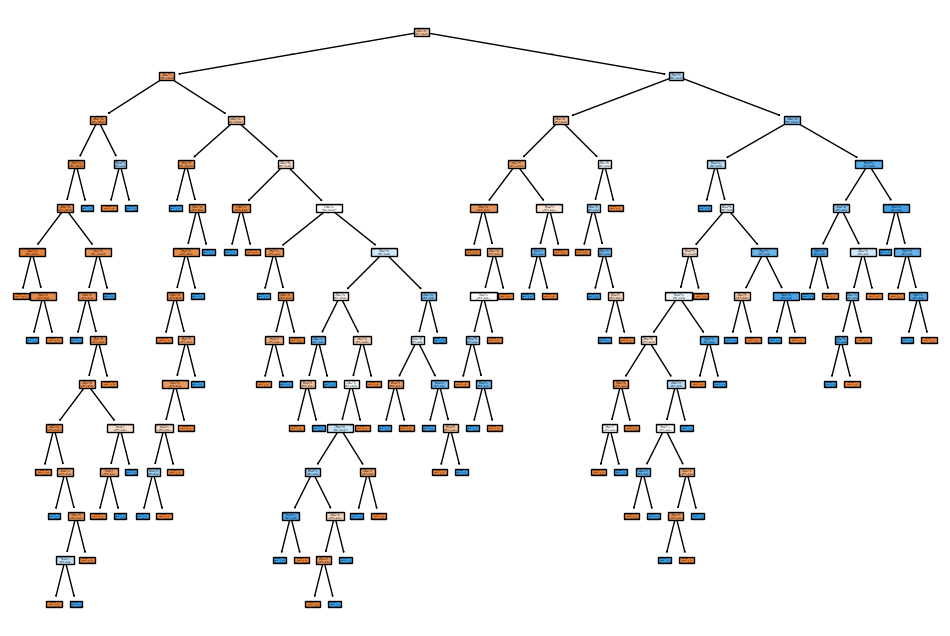

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()

Task 12

In [ ]:
# Feature Importance
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Glucose                     0.331583
BMI                         0.169211
DiabetesPedigreeFunction    0.138457
Age                         0.117953
BloodPressure               0.108247
Pregnancies                 0.050755
Insulin                     0.044033
SkinThickness               0.039761
dtype: float64


Task 13

In [ ]:
# Task 13: Train K-Nearest Neighbors and compare
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       125
           1       0.55      0.34      0.42        67

    accuracy                           0.67       192
   macro avg       0.63      0.60      0.60       192
weighted avg       0.65      0.67      0.65       192



Task 14

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/pm25_2016_2020.csv")

# Identify two columns for geographic analysis
# Assuming 'Latitude' and 'Longitude' are present in the dataset
geo_columns = ["latitude_x", "longitude_x"]

print(df[geo_columns].head())



   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


Task 15

In [ ]:
# Create new DataFrame X with only the selected columns
X = df[geo_columns].copy()
print(X.head())


   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


Task 16

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
pred_clusters = kmeans.fit_predict(X)
X['Cluster'] = pred_clusters
print(X.head())

   latitude_x  longitude_x  Cluster
0   39.024265   -95.711275        2
1   39.024265   -95.711275        2
2   39.024265   -95.711275        2
3   39.024265   -95.711275        2
4   39.024265   -95.711275        2


Task 17

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Added random_state for reproducibility
X["cluster"] = kmeans.fit_predict(X)

# Convert the cluster labels into categorical type
X["cluster"] = X["cluster"].astype("category")

# Count observations in each cluster
cluster_counts = X["cluster"].value_counts()
print(cluster_counts)


cluster
0    25672
2    24659
3    22089
1    16918
4    10662
Name: count, dtype: int64


Task 18

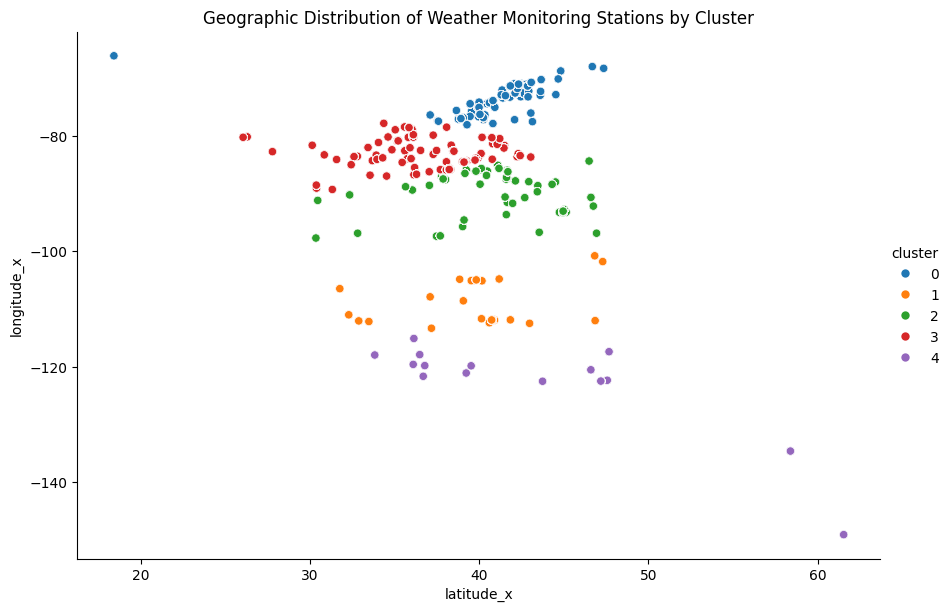

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Plot the clusters
sns.relplot(x="latitude_x", y="longitude_x", hue="cluster", data=X, height=6, aspect=1.5, palette="tab10")

# Add title
plt.title("Geographic Distribution of Weather Monitoring Stations by Cluster")

# Show the plot
plt.show()
